<a href="https://colab.research.google.com/github/luojun/notebooks/blob/master/bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mean = 0.0
sigma = 1.0
size = 10
true_values = np.random.normal(mean, sigma, size)

In [0]:
num_samples = 10000
rewards = [np.random.normal(true_value, sigma, size=num_samples) for true_value in true_values]

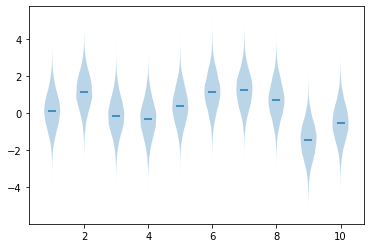

In [0]:
a = plt.violinplot(rewards, list(range(1,size+1)), points=100, widths=0.5, showmeans=True, showextrema=False)

In [0]:
class Bandits:
  def __init__(self, num_of_arms):
    self._num_of_arms = num_of_arms
    self._true_values = np.random.normal(0.0, 1.0, num_of_arms)

  def pull(self, arm):
    return np.random.normal(self._true_values[arm], 1.0)

class BanditsSolver:
  def __init__(self, num_of_arms, epsilon=0.0):
    self._num_of_arms = num_of_arms
    self._epsilon = epsilon
    self._Q = [0.0] * num_of_arms
    self._sums_of_rewards = [0.0] * num_of_arms
    self._counts = [0] * num_of_arms 

  def update(self, arm, reward):
    self._sums_of_rewards[arm] += reward
    self._counts[arm] += 1
    self._Q[arm] = self._sums_of_rewards[arm] / self._counts[arm]

  def decide(self):
    if np.random.uniform() < self._epsilon:
      return np.random.randint(self._num_of_arms)
    else:
      indices = np.argwhere(self._Q == np.amax(self._Q)).flatten()
      return np.random.choice(indices)

In [0]:
class TenArmedTestbed:
  def __init__(self, arms=10, steps=10000, experiments=2000):
    self._arms = arms
    self._steps = steps
    self._experiments = experiments

  def run_experiment(self, epsilon=0.0):
    bandits = Bandits(self._arms)
    solver = BanditsSolver(self._arms, epsilon)
    rewards = np.zeros(self._steps)
    for i in range(self._steps):
      arm = solver.decide()
      rewards[i] = bandits.pull(arm)
      solver.update(arm, rewards[i])
    return(rewards)

  def evaluate(self, epsilon=0.0):
    cumulative_rewards = np.zeros(self._steps)
    for i in range(self._experiments):
      cumulative_rewards += self.run_experiment(epsilon)
    average_rewards = cumulative_rewards / self._experiments
    return average_rewards

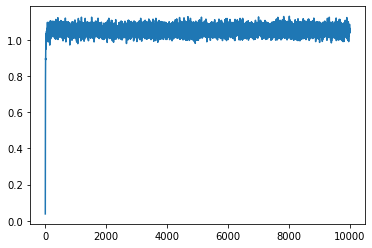

In [193]:
testbed = TenArmedTestbed()
rewards = testbed.evaluate()
plt.plot(rewards)

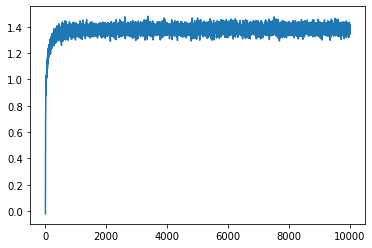

In [194]:
rewards = testbed.evaluate(0.1)
plt.plot(rewards)

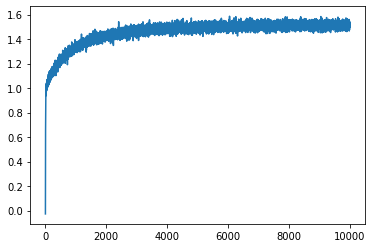

In [195]:
rewards = testbed.evaluate(0.01)
plt.plot(rewards)